# Load in the data and normalise

This takes a while so I add print statements to show when it's done...

In [1]:
! ls -l ../dataset/

total 156656392
-rw-r--r--  1 sarmadtarar  staff      3258527 23 Apr 16:47 dataset_sample.csv
-rw-r--r--@ 1 sarmadtarar  staff    176473873 27 Apr 13:30 groupby_results_weekdayy_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff    169368141 27 Apr 13:30 groupby_results_weekend_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff  39929480142 24 Apr 17:12 qut_it_capstone_ailbatross_20181029_nmi_data_20181029.csv
-rw-r--r--@ 1 sarmadtarar  staff  28630797979 25 Apr 16:20 weekday_split_weekdays.csv
-rw-r--r--@ 1 sarmadtarar  staff  11298682219 25 Apr 16:30 weekday_split_weekends.csv


In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numeric_columns = [f'ekw{i+1}' for i in range(48)]

scaler = MinMaxScaler()

weekends_df = pd.read_csv('../dataset/groupby_results_weekend_groupby_means.csv', index_col='nmi_uuid')
weekdays_df = pd.read_csv('../dataset/groupby_results_weekdayy_groupby_means.csv', index_col='nmi_uuid')

weekends_df[numeric_columns] = scaler.fit_transform(
                                    weekends_df[numeric_columns].transpose()
                                ).transpose()

weekdays_df[numeric_columns] = scaler.fit_transform(
                                    weekdays_df[numeric_columns].transpose()
                                ).transpose()

print('Data is normalised and ready to be processed')

Data is normalised and ready to be processed


# Sanity Check

Remove bad rows

In [28]:
bad_rows = weekends_df[~(weekends_df[[f'ekw{i+1}' for i in range(48)]] > 0.99).any(axis=1)] # all rows should range between 0 and 1

bad_rows.head() # these rows have something wrong with them..

,ekw1,ekw2,ekw3,ekw4,ekw5,ekw6,ekw7,ekw8,ekw9,ekw10,...,ekw39,ekw40,ekw41,ekw42,ekw43,ekw44,ekw45,ekw46,ekw47,ekw48
nmi_uuid,,,,,,,,,,,,,,,,,,,,,
202b5475-ef48-4c71-9c1a-26f27ec0faac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2676328b-cac3-4801-b6ef-09d25e9696e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2b06621a-9e3e-4986-a198-c5b3c9efcdc8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324d1e0f-7881-4810-b41e-2b80862e2ebb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325f230a-c2de-44dc-85e0-d4dee4dd8867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
weekends_df = weekends_df[(weekends_df[[f'ekw{i+1}' for i in range(48)]] > 0.99).any(axis=1)] # all rows should range between 0 and 1

weekends_df.head()

,ekw1,ekw2,ekw3,ekw4,ekw5,ekw6,ekw7,ekw8,ekw9,ekw10,...,ekw39,ekw40,ekw41,ekw42,ekw43,ekw44,ekw45,ekw46,ekw47,ekw48
nmi_uuid,,,,,,,,,,,,,,,,,,,,,
0018cc7a-2c30-4922-9302-802bd2b2084f,0.321625,0.274449,0.250689,0.229855,0.203340,0.197486,0.193182,0.264463,1.000000,0.411157,...,0.576102,0.544249,0.471074,0.501205,0.343836,0.418733,0.363292,0.318010,0.270833,0.347796
008736af-a01c-4715-bdd9-d6aa1694a5d0,0.408637,0.194922,0.197921,0.389844,0.407637,0.653938,0.225110,0.381248,0.533187,0.694922,...,0.418832,0.356857,0.978409,0.285486,0.801080,0.670532,0.497401,0.380848,0.076969,0.073171
0088ea6e-6d7a-49f6-b1f5-2d09fc3358ba,0.228623,0.233432,0.259102,0.162799,0.155249,0.192998,0.025334,0.012919,0.072255,0.000000,...,0.100498,0.076785,0.071584,0.073989,0.880488,1.000000,0.777082,0.437559,0.293384,0.300934
00990a9e-8bda-40c4-b1a3-986dcf5d97ec,0.099850,0.080649,0.028446,0.018404,0.005884,0.005928,0.013626,0.003097,0.021545,0.011812,...,1.000000,0.926119,0.487790,0.343037,0.261414,0.267298,0.194789,0.146832,0.146700,0.120244
009f80a2-a7ef-48b5-aa92-1e358f26b0c1,0.410289,0.373275,0.377039,0.367001,0.296738,0.317440,0.351945,0.333124,0.360100,0.345671,...,0.597867,0.590966,0.604141,0.735257,0.683814,0.553952,0.512547,0.479925,0.414680,0.402133


# Test KMeans on a range of n_cluster values


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

numeric_data = np.asarray(
    weekends_df[[f'ekw{i+1}' for i in range(48)]]
)

#clean up nans - this should have been weeded out in the previous cell anyway
nans = np.any(np.isnan(numeric_data), axis=1)
numeric_data = numeric_data[~nans]

intra_cluster_variances = np.zeros((1, 15))
inter_cluster_variances = np.zeros((1, 15))

for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=3).fit(numeric_data)
    cluster_indices = kmeans.predict(numeric_data)
    
    # intra-cluster variance:
    total_intracluster_variance = np.zeros((1, 48))
    for i in range(n_clusters):
        cluster_subset = numeric_data[cluster_indices == i]
        variance = np.var(cluster_subset, axis=0) # variance along each column, NOT the flattened array
        total_intracluster_variance += variance
    
    # inter-cluster variance:
    intercluster_variance = np.sum(np.var(kmeans.cluster_centers_, axis=0))
    
    intra_cluster_variances[0, n_clusters] = np.sum(total_intracluster_variance) / n_clusters
    inter_cluster_variances[0, n_clusters] = intercluster_variance
    
    print(f'Intra-cluster variance @ {n_clusters}', np.sum(total_intracluster_variance) / n_clusters)
    print(f'Inter-cluster variance @ {n_clusters}', intercluster_variance)

Intra-cluster variance @ 1 3.3814788613830826
Inter-cluster variance @ 1 0.0
Intra-cluster variance @ 2 2.550784695021186
Inter-cluster variance @ 2 0.8140167392417859
Intra-cluster variance @ 3 2.198823094519186
Inter-cluster variance @ 3 1.1769040053933113
Intra-cluster variance @ 4 2.039977504755237
Inter-cluster variance @ 4 1.5580884887719588
Intra-cluster variance @ 5 1.9525534111497351
Inter-cluster variance @ 5 1.9412457889184842
Intra-cluster variance @ 6 1.8635532651332332
Inter-cluster variance @ 6 2.155709292473169


# Intra- cluster variance

# Visualise cluster centers

/Users/sarmadtarar/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


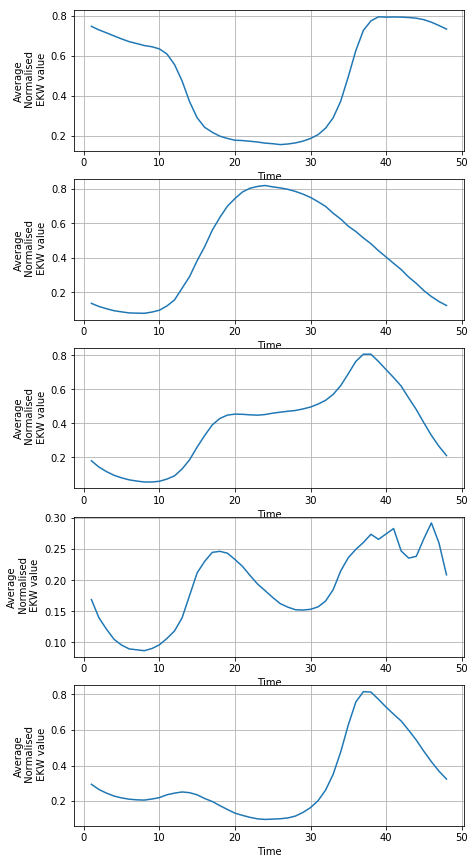

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(
    num='Cluster centres for each user\'s averaged, normalised weekend',
    figsize=(7, 15)
)

for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(range(1, 49), kmeans.cluster_centers_[i, :])
    plt.grid('on')
    plt.ylabel('Average\n Normalised\n EKW value')
    plt.xlabel('Time')
